Images Path: /Users/shravanisajekar/Desktop/unet_dataset/ISIC2018_Task1-2_Test_Input
Masks Path: /Users/shravanisajekar/Desktop/unet_dataset/ISIC2018_Task1_Test_GroundTruth
Number of Images: 1000
Number of Masks: 1000
32/32 [==============================] - 102s 3s/step


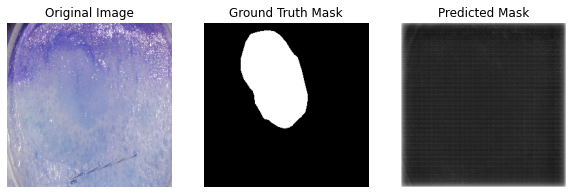

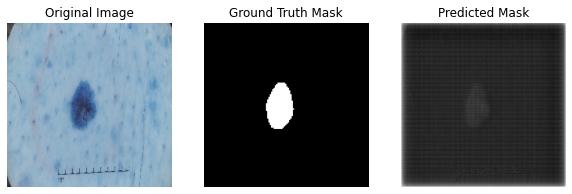

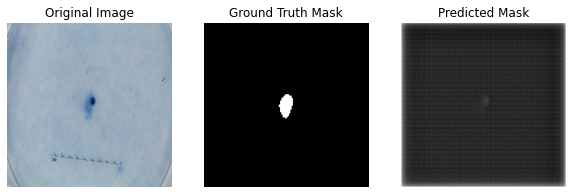

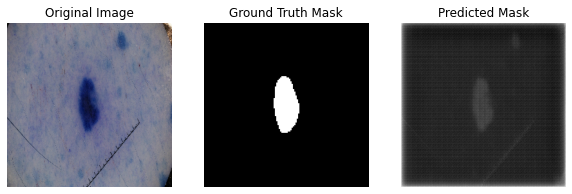

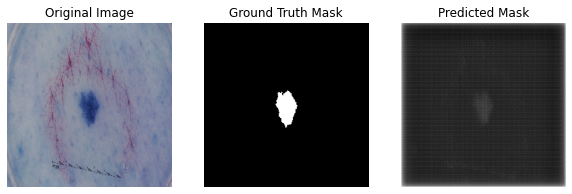

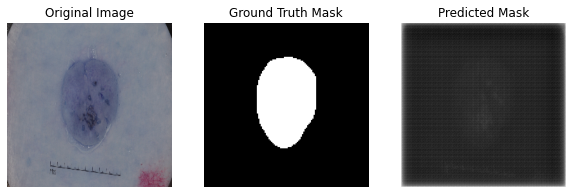

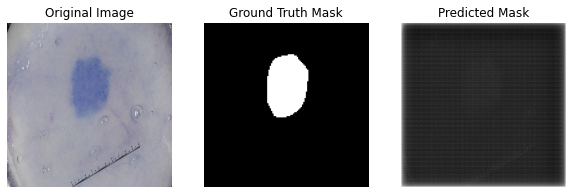

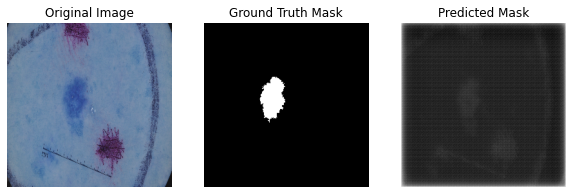

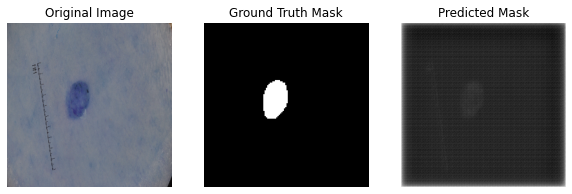

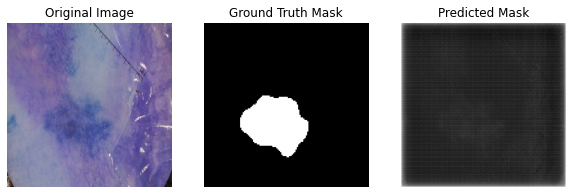

IoU Score: tf.Tensor(0.174309, shape=(), dtype=float32)
Dice Coefficient: tf.Tensor(0.29687035, shape=(), dtype=float32)


In [7]:
import os
import numpy as np
import cv2
import tensorflow as tf
from glob import glob
from model import build_unet
from metrics import iou, dice_coef
import matplotlib.pyplot as plt

def load_test_data(dataset_path):
    images_path = os.path.join(dataset_path, "ISIC2018_Task1-2_Test_Input")
    masks_path = os.path.join(dataset_path, "ISIC2018_Task1_Test_GroundTruth")

    print("Images Path:", images_path)
    print("Masks Path:", masks_path)

    images = sorted(glob(os.path.join(images_path, "*.jpg")))
    masks = sorted(glob(os.path.join(masks_path, "*.png")))

    print("Number of Images:", len(images))
    print("Number of Masks:", len(masks))

    assert len(images) == len(masks), "Number of images and masks do not match."

    test_x = []
    test_y = []

    for img_path, mask_path in zip(images, masks):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Preprocess the images and masks if necessary
        img = cv2.resize(img, (256, 256)) / 255.0
        mask = cv2.resize(mask, (256, 256)) / 255.0
        mask = np.expand_dims(mask, axis=-1)

        test_x.append(img)
        test_y.append(mask)

    return np.array(test_x), np.array(test_y)

def evaluate_model(model, test_x, test_y):
    # Evaluate the model on the test dataset
    predictions = model.predict(test_x)

    # Compute IoU and Dice Coefficient
    iou_score = iou(test_y, predictions)
    dice_score = dice_coef(test_y, predictions)

    return iou_score, dice_score, predictions

def visualize_results(images, masks, predictions):
    num_samples = 10
    for i in range(num_samples):
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 3, 1)
        plt.imshow(images[i])
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.show()
    

if __name__ == "__main__":
    # Load trained model
    model_path = "/Users/shravanisajekar/Downloads/files/model.h5"
    custom_objects = {'dice_coef': dice_coef, 'iou': iou}
    model = tf.keras.models.load_model(model_path,custom_objects=custom_objects)

    # Load test dataset
    dataset_path = "/Users/shravanisajekar/Desktop/unet_dataset"
    test_x, test_y = load_test_data(dataset_path)

    # Evaluate the model
    iou_score, dice_score, predictions = evaluate_model(model, test_x, test_y)

    # Visualize the results
    visualize_results(test_x, test_y, predictions)

    print("IoU Score:", iou_score)
    print("Dice Coefficient:", dice_score)


Epoch 1/5
200/200 [==============================] - 279s 1s/step - loss: 0.4613 - accuracy: 0.8028 - val_loss: 0.6814 - val_accuracy: 0.7515
Epoch 2/5
200/200 [==============================] - 287s 1s/step - loss: 0.3820 - accuracy: 0.8465 - val_loss: 0.7569 - val_accuracy: 0.6671
Epoch 3/5
200/200 [==============================] - 301s 2s/step - loss: 0.3326 - accuracy: 0.8664 - val_loss: 0.4644 - val_accuracy: 0.8578
Epoch 4/5
200/200 [==============================] - 304s 2s/step - loss: 0.3262 - accuracy: 0.8714 - val_loss: 0.4017 - val_accuracy: 0.8376
Epoch 5/5
200/200 [==============================] - 300s 1s/step - loss: 0.3070 - accuracy: 0.8788 - val_loss: 0.6205 - val_accuracy: 0.7819


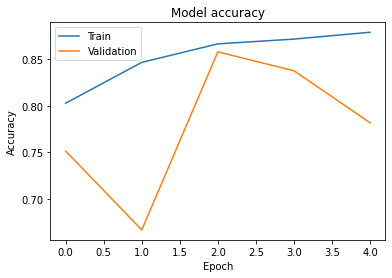

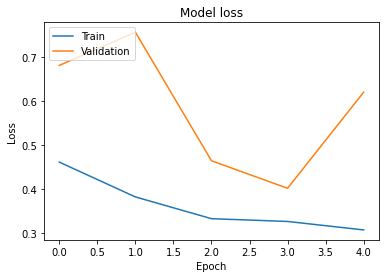

In [11]:
def evaluate(model, test_x, test_y):
    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Evaluate the model
    history = model.fit(test_x, test_y, batch_size=4, epochs=5, validation_split=0.2, verbose=1)

    return history

def plot_evaluation(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
# Evaluate the model
history = evaluate(model, test_x, test_y)

# Visualize evaluation metrics
plot_evaluation(history)